# UTD data processing & SI/AI generation

In [1]:
import os
import re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


### Load data

In [3]:
# Function for generating standard type of signal data
def get_signal(file_names):
    
    out_list = []
    
    for file_name in file_names:
        
        raw_data = pd.read_csv(path + file_name)
        
        if len(raw_data) < 128:
            continue
        
        subject = re.match(r'a.*?(?=_t)',file_name).group()[-1]
        activity = re.match(r'a.*?(?=_s)',file_name).group()[1:]
        remove_subject = ['22', '23', '24', '25', '26', '27']
        
        # Ignore the activity from 22 to 27
        if activity in remove_subject:
            continue
            
        else:
            acc_x = np.array(raw_data['0'])[:128]
            acc_y = np.array(raw_data['1'])[:128]
            acc_z = np.array(raw_data['2'])[:128]
            gyro_x = np.array(raw_data['3'])[:128]
            gyro_y = np.array(raw_data['4'])[:128]
            gyro_z = np.array(raw_data['5'])[:128]


        temp_array = np.array([subject, acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z, activity],dtype=object)
        out_list.append(temp_array)
    
    return out_list
    

In [4]:
# Get all file names of sensor data
path = './UTD-Data/UTD/csv/'
file_names = os.listdir(path)

col_label = ['Subject', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z','Activity']

# Extract the activities from 1 to 21
sig_data = get_signal(file_names)
sig_data_df = pd.DataFrame(sig_data, columns=col_label)


In [5]:
len(sig_data_df)

649

In [6]:
sig_data_df.head()

,Subject,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Activity
0,1,"[-0.9516600000000001, -0.948486, -0.9404299999...","[-0.41626, -0.425537, -0.426025, -0.507568, -0...","[-0.09106399999999999, -0.118652, -0.140869, -...","[-18.198473, -18.717557, -21.40458, -23.389313...","[-8.671756, -7.847328, -5.679389, -2.229008000...","[8.610686999999999, 6.442748, 2.22900800000000...",10
1,1,"[-0.959717, -0.964355, -0.976807, -0.980713, -...","[-0.33129899999999995, -0.343018, -0.370117000...","[-0.11108399999999999, -0.126953, -0.140381, -...","[6.564885, 10.80916, 12.091603, 8.152672, 5.28...","[0.335878, 1.7404580000000003, 3.541985, 7.725...","[-2.80916, -3.603053, -6.10687, -9.679389, -14...",10
2,1,"[-0.954834, -0.9628909999999999, -0.962158, -0...","[-0.43335, -0.480469, -0.5014649999999999, -0....","[-0.223877, -0.280273, -0.32055700000000004, -...","[5.648855, 6.564885, 2.167939, 1.557252, 5.526...","[12.274809, 16.0, 20.702289999999998, 27.14503...","[-13.19084, -16.763359, -18.59542, -24.824427,...",10
3,1,"[-0.938232, -0.9472659999999999, -0.935059, -0...","[-0.321533, -0.32959, -0.31738299999999997, -0...","[-0.190674, -0.190186, -0.19653299999999999, -...","[-1.89313, -1.3435110000000001, -1.435115, 0.0...","[-0.396947, 0.274809, 0.8549620000000001, 1.43...","[-1.5877860000000001, -1.770992, -1.679389, -1...",10
4,2,"[-0.976318, -0.981934, -0.9855959999999999, -0...","[-0.185059, -0.18676800000000002, -0.187256, -...","[0.304199, 0.305664, 0.302246, 0.3044429999999...","[-1.7404580000000003, -1.770992, -1.770992, -1...","[1.3435110000000001, 1.282443, 1.251908, 1.374...","[-0.70229, -0.70229, -0.641221, -0.580153, -0....",10


In [7]:
# Split the data set into train & test set
from sklearn.model_selection import train_test_split

train_UTD, test_UTD = train_test_split(sig_data_df, test_size=0.2, random_state=42)

train_UTD_feature = train_UTD.drop(['Subject','Activity'], axis=1)
train_UTD_label = train_UTD['Activity']

test_UTD_feature = test_UTD.drop(['Subject','Activity'], axis=1)
test_UTD_label = test_UTD['Activity']

In [8]:
train_UTD.head()

,Subject,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Activity
332,6,"[-1.005615, -1.009033, -0.999023, -1.004883, -...","[-0.11181600000000001, -0.12329100000000001, -...","[0.057861, 0.052979, 0.05127, 0.050049, 0.0295...","[1.282443, 0.122137, -1.5877860000000001, -2.8...","[0.824427, 0.7938930000000001, 0.4580149999999...","[-0.45801499999999995, -0.671756, -1.099237, -...",1
29,8,"[-0.9897459999999999, -0.980957, -0.979736, -0...","[-0.185547, -0.17724600000000001, -0.182861, -...","[0.128906, 0.12133800000000002, 0.114501999999...","[-4.549618, -3.8778629999999996, -4.152672, -3...","[2.625954, 0.305344, -0.396947, 0.427481000000...","[-2.3511450000000003, -2.412214, -1.007634, 1....",10
302,6,"[-1.009521, -1.036377, -1.041504, -1.040039, -...","[-0.1604, -0.16406300000000001, -0.23290999999...","[0.042236, 0.037108999999999996, -0.021484, -0...","[-1.221374, -7.541985, -9.740458, -14.412214, ...","[-0.48855, -0.763359, -1.099237, -2.5038169999...","[-1.770992, -1.679389, -1.7099240000000002, -3...",19
286,2,"[-1.0314940000000001, -1.105225, -1.169189, -1...","[-0.45629899999999995, -0.607178, -0.753174, -...","[0.462158, 0.38623, 0.297852, 0.201172, 0.1567...","[-55.603053, -82.900763, -100.427481, -108.091...","[6.717557000000001, 11.419847, 23.022901, 41.1...","[-4.580153, -7.6335880000000005, -25.709923999...",19
554,8,"[-1.011475, -1.0310059999999999, -1.027588, -1...","[-0.23901399999999998, -0.238281, -0.212891, -...","[0.029053, 0.007324, 0.0271, 0.063965, -0.0427...","[-0.671756, -4.061069, 0.244275, 16.152672, 27...","[-1.40458, 0.244275, 3.6335879999999996, 5.984...","[0.9160309999999999, -0.42748100000000006, -1....",6


### Jiang & Yin's method

In [9]:
def alg_2(raw_signal): ### input:raw signal list (6xNumber of sample point)
    Ns = len(raw_signal)
    sis = []
    signal_images = []
    for i in range(1,Ns+1):
        sis.append(i)
        signal_images.append(raw_signal[i-1])
    i = Ns
    j = i + 1
    Nsis = len(sis)
    while (i != j):
        inter_sis = list(zip(sis, sis[1:] + sis[:0]))
        if j > (Ns):
            j = 1
        elif (i,j) not in inter_sis and (j,i) not in inter_sis:
            sis.append(j)
            signal_images.append(raw_signal[j-1])
            Nsis += 1
            i = j
            j = i + 1
        else:
            j = j+1
    print("SIS:",sis,"NSIS:",Nsis,"(i,j):",(i,j))
    return signal_images

### New Method

In [10]:
# Algoritnm for Signal data arrangement
def order_SI(raw_sig):
    
    # The raw should be a [n,sensor_type] size array
    
    # According to the number of the types of sensor data
    # Generate a list of all possible pairs of each two sensor data
    type_sensor = raw_sig.shape[1]
    pair_list = []
    
    for i in range (1,type_sensor):
        temp_list = []
        temp_list = [temp_list+[i,j+1] for j in range(i,type_sensor)]
        pair_list += temp_list
        
    # After getting all possible pairs
    # Complete the sig_list that ensure each two sensor datas are adjacent at least once
    
    # The idea is to initial the sig_list as [1,2], 
    # Then combine other possible pairs at both ends of the sig_list according to the same number
    # The priority of the combination is from long list(e.g., [1,x]) to short list(e.g., [5,x]) in pair_list
    
    # Initial the sig_list to store the arrange of each input signal vectors
    sig_list = pair_list[0]
    del pair_list[0]
    
    # Run the process until no element in pair_list
    while pair_list:
        
        for pair in pair_list:
               
            if sig_list[0] == pair[0]:
                sig_list.insert(0,pair[1])
                pair_list.remove(pair)
                break
                

            elif sig_list[0] == pair[1]:
                sig_list.insert(0,pair[0])
                pair_list.remove(pair)
                break
                

            elif sig_list[-1] == pair[0]:
                sig_list.append(pair[1])
                pair_list.remove(pair)
                break
                

            elif sig_list[-1] == pair[1]:
                sig_list.append(pair[0])
                pair_list.remove(pair)
                break
                
                
            elif pair == pair_list[-1]:
                sig_list.append(pair[0])
                sig_list.append(pair[1])
                pair_list.remove(pair)
                break
    
#     # Initial a list to store reconstructed raw data
#     sig_img = []
#     for sig_order in sig_list:
#         sig_img.append(raw_sig[sig_order-1])
    
    return sig_list


### Generate Signal Image & activity image

In [11]:
# Split the data set into train & test set
from sklearn.model_selection import train_test_split

train_UTD, test_UTD = train_test_split(sig_data_df, test_size=0.2, random_state=42)

train_UTD_feature = np.array(train_UTD.drop(['Subject','Activity'], axis=1))
train_UTD_label = np.array(train_UTD['Activity'])

test_UTD_feature = np.array(test_UTD.drop(['Subject','Activity'], axis=1))
test_UTD_label = np.array(test_UTD['Activity'])

In [12]:
len(test_UTD_label)

130

In [13]:
# Generate SI & AI 3d array
sig_list = order_SI(train_UTD_feature)

# Initial an empty 3d array
train_feature = np.empty(shape = (len(train_UTD_feature), len(sig_list), 128))
test_feature = np.empty(shape = (len(test_UTD_feature), len(sig_list), 128))

train_less_128 = []
test_less_128 = []

for i in range(len(train_UTD_feature)):

    temp_act = np.vstack([np.stack(train_UTD_feature[i])[sig_order-1] for sig_order in sig_list])
    
    if temp_act.shape[1] != 128:
        train_less_128.append({i:temp_act.shape[1]})
        continue
    
    train_feature[i, :, :] = temp_act
    

for i in range(len(test_UTD_feature)):
    
    temp_act = np.vstack([np.stack(test_UTD_feature[i])[sig_order-1] for sig_order in sig_list])
    
    if temp_act.shape[1] != 128:
        test_less_128.append({i:temp_act.shape[1]})
        continue
    
    test_feature[i, :, :] = temp_act
    
print(train_less_128)
print(test_less_128)

[]
[]


In [14]:
atrain_less_128 = [{36: 127}, {55: 127}, {56: 125}, {68: 109}, {70: 123}, {91: 107}, {143: 126}, {204: 114}, {233: 127}, {305: 125}, {308: 118}, {315: 112}, {326: 122}, {352: 114}, {391: 125}, {408: 124}, {466: 127}, {483: 125}, {493: 122}, {525: 125}]
atest_less_128 = [{22: 127}, {87: 125}]

In [15]:
test_feature.shape

(130, 18, 128)

In [16]:
# Function for generating Image 
def make_IMG(sig_img):
  
    # Normalize the data
    # norm_sig_img = (sig_img-sig_img.mean())/(sig_img.std())
    
    # DFT process
    sig_fft = np.abs(np.fft.fft2(sig_img))
    sig_fft_shift = np.fft.fftshift(sig_fft)
    
    return sig_fft_shift
    


In [17]:
train_UTD_AI = []
test_UTD_AI = []

for sig_img in train_feature:
    
    img_AI = make_IMG(sig_img)
    train_UTD_AI.append(img_AI)
    
for sig_img in test_feature:
    
    img_AI = make_IMG(sig_img)
    test_UTD_AI.append(img_AI)
    
print(len(train_UTD_AI))
print(len(test_UTD_AI))


519
130


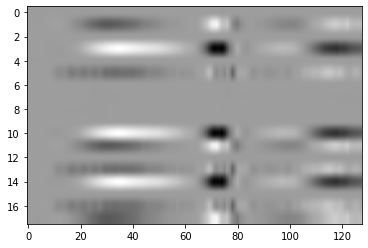

In [18]:
plt.imshow(train_feature[111],cmap = "gray",aspect="auto")

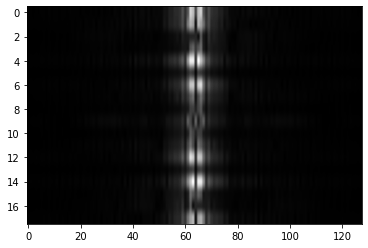

In [20]:
plt.imshow(train_UTD_AI[111],cmap = "gray",aspect="auto")

## Save as npy

In [21]:
np.save('train_UTD_AI.npy', train_UTD_AI)
np.save('test_UTD_AI.npy', test_UTD_AI)
np.save('train_UTD_labels.npy', train_UTD_label)
np.save('test_UTD_labels.npy', test_UTD_label)

In [22]:
print(np.load('train_UTD_AI.npy').shape)
print(np.load('test_UTD_AI.npy').shape)
print(np.load('train_UTD_labels.npy',allow_pickle=True).shape)
print(np.load('test_UTD_labels.npy',allow_pickle=True).shape)

(519, 18, 128)
(130, 18, 128)
(519,)
(130,)


## CNN - Geroge

In [ ]:
aaa+b

## CNN

In [ ]:
#Two Conv & Two FC

# Define the CNN Class

class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        
        self.pad_zero = nn.ZeroPad2d(1)
        self.conv1 = nn.Conv2d(1, 10, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 100)
        self.fc2 = nn.Linear(100, 10)
        
    def forward(self, x):
        x = self.pad_zero(x)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

a_CNN = CNN1()

In [ ]:
params = list(a_CNN.parameters())
print(len(params))
print(params[0].size())
print(params[1].size())
print(params[1])

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(a_CNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Train Process

max_epochs=2

# Start for train time timing
torch.cuda.synchronize()
start_a = time.time()

for epoch in range(max_epochs):
    
    traindata = iter(trainloader)
    print(epoch)
    running_loss = 0.0
    i = 0
    
    for images, labels in traindata:
        
        i += 1
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        
        outputs = a_CNN(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

# End for train time timing
torch.cuda.synchronize()
end_a = time.time()
